# Wannierisation of GaAs

This example shows how to perform Wannierisation of GaAs using the WannierBerri code

## 1. read the results of the DFT calculation

this is done via the `irrep` code which is interfaced with several DFT codes (e.g., VASP, Quantum ESPRESSO, ABINIT, etc.) 
`irrep` is a dependency of WannierBerri and should be already installed if you have installed WannierBerri.

I have pre-calculated results of the QE and pw2wannier90 calculations in the 'QEfiles' directory.

In [1]:

from irrep.bandstructure import BandStructure
  # adjust path if needed to point to the data in the tests fo wannier-berri repository
bandstructure = BandStructure(code='espresso', prefix='QEfiles/GaAs')  
spacegroup = bandstructure.spacegroup
spacegroup.show()



 ---------- CRYSTAL STRUCTURE ---------- 


Cell vectors in angstroms:

      Vectors of DFT cell       |      Vectors of REF. cell      
a0 = -2.8270   0.0000   2.8270  |  a0 = -2.8270   0.0000  -2.8270
a1 =  0.0000   2.8270   2.8270  |  a1 =  0.0000   2.8270   2.8270
a2 = -2.8270   2.8270   0.0000  |  a2 =  2.8270   2.8270   0.0000

Atomic positions in direct coordinates:

Atom type |   Position in DFT cell    |   Position in REF cell   
    1     |  0.0000   0.0000   0.0000 |  0.0000   0.0000   0.0000
    2     |  0.2500   0.2500   0.2500 |  0.2500   0.2500   0.2500


 ---------- SPACE GROUP ----------- 


Space group: F-43m (# 216)
Number of unitary symmetries: 24 (mod. lattice translations)

The transformation from the DFT cell to the reference cell of tables is given by: 
        |   1.0000  0.0000  0.0000 |
refUC = |   0.0000  1.0000  0.0000 |    shiftUC = [0. 0. 0.]
        |   0.0000  0.0000  1.0000 |


 ### 1 

rotation : |  1   0   0 |
           |  0   1   0 |
           

## 2. Define the initial projections

Projections are used as initial guess for Wannier functions, and also will be used to define the symmetry properties of the Wannier functions.

For GaAs, one typicall uses sp3 projections, but one can use s and p separately.

There is also a more exotic way of choosing, for example the bonding and anti-bonding orbitals.


In [ ]:
import numpy as np
from wannierberri.symmetry.projections import Projection, ProjectionsSet
# now set the transformations of WFs. Make sure, the projections are consistent with the amn file
proj_Ga_sp3 = Projection(position_num = [[0,0,0]], orbital='sp3', spacegroup=spacegroup)
proj_As_sp3 = Projection(position_num = [[1/4,1/4,1/4]], orbital='sp3', spacegroup=spacegroup)
proj_Ga_p = Projection(position_num = [[0,0,0]], orbital='p', spacegroup=spacegroup)
proj_Ga_s = Projection(position_num = [[0,0,0]], orbital='s', spacegroup=spacegroup)
proj_As_p = Projection(position_num = [[1/4,1/4,1/4]], orbital='p', spacegroup=spacegroup)
proj_As_s = Projection(position_num = [[1/4,1/4,1/4]], orbital='s', spacegroup=spacegroup)

proj_s_bond = Projection(position_num = [[1/8,1/8,1/8]], orbital='s', spacegroup=spacegroup)
proj_p_bond = Projection(position_num = [[1/8,1/8,1/8]], orbital='pz', 
                         zaxis =  np.array([1,1,1])@spacegroup.lattice, 
                         rotate_basis=True,
                         spacegroup=spacegroup)

projections_set = ProjectionsSet(projections=[proj_Ga_sp3, proj_As_sp3],)
# projections_set = ProjectionsSet(projections=[proj_Ga_s, proj_Ga_p, proj_As_s, proj_As_p],)
# projections_set = ProjectionsSet(projections=[proj_s_bond, proj_p_bond],) # bonding and antibonding states

## 3. Create the symmetrizer object

Follwoing the paper by Sakuma https://journals.aps.org/prb/abstract/10.1103/PhysRevB.87.235109

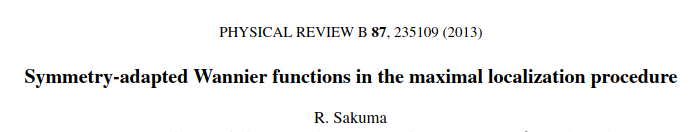


We need to define how the DFT wavefunctions and the Wannier functions transform under symmetry operations.


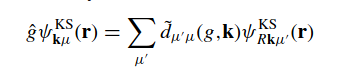  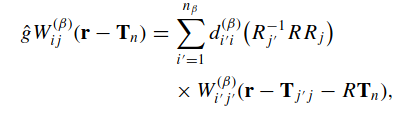

The first are evaluated from the bandstructure, the later depends on the projections

the SymmetrizerSAWF object is similar in spirit to the 'dmn' file in Wannier90, but it is more general and effcient, and also can include magnetic  symmetries.

In [3]:
from wannierberri.symmetry.sawf import SymmetrizerSAWF
symmetrizer = SymmetrizerSAWF().from_irrep(bandstructure)
symmetrizer.set_D_wann_from_projections(projections_set)

mpgrid = [4 4 4], 64
 [[-0.08360829+0.33901891j]] 
 symm_matrix: block 25:26 of 26
 [[-0.83278342+0.j]] 
 symm_matrix: block 25:26 of 26
 [[-0.08360829-0.33901891j]] 
 symm_matrix: block 25:26 of 26
 [[-0.15459725-2.08166817e-17j]] 
 symm_matrix: block 25:26 of 26
 [[0.93201887+1.11022302e-16j]] 
 symm_matrix: block 25:26 of 26
 [[-0.01261933+0.j]] 
 symm_matrix: block 25:26 of 26
 [[-0.76480229-5.55111512e-17j]] 
 symm_matrix: block 25:26 of 26
 [[0.1837837-0.22774516j]] 
 symm_matrix: block 25:26 of 26
 [[0.78199082+2.77555756e-17j]] 
 symm_matrix: block 25:26 of 26
 [[-0.47208419+0.46909177j]] 
 symm_matrix: block 25:26 of 26
 [[-0.49369034-0.24134661j]] 
 symm_matrix: block 25:26 of 26
 [[0.66462688-0.11127375j]] 
 symm_matrix: block 25:26 of 26
 [[0.20538985-1.21430643e-17j]] 
 symm_matrix: block 25:26 of 26
 [[-0.37632639-0.13007286j]] 
 symm_matrix: block 25:26 of 26
 [[-0.49369034+0.24134661j]] 
 symm_matrix: block 25:26 of 26
 [[0.1837837+0.22774516j]] 
 symm_matrix: block 25:

## 4. initial projections 'amn' file

In [4]:
from wannierberri.w90files.amn import amn_from_bandstructure
amn = amn_from_bandstructure(bandstructure=bandstructure, projections=projections_set)

finding num points from 2 projections
Creating amn. Using projections_set 
ProjectionsSet with 8 Wannier functions and 0 free variables
Projection 0.125, 0.125, 0.125:['s'] with 4 Wannier functions on 4 points (1 per site)
Projection 0.125, 0.125, 0.125:['pz'] with 4 Wannier functions on 4 points (1 per site)


/home/stepan/anaconda3/envs/wbvenv/lib/python3.12/site-packages/wannierberri/symmetry/orbitals.py:256: RuntimeWarning: invalid value encountered in divide
  g_costheta = gk[:, 2] / gk_abs


## 5. Read the files evaluated by pw2wannier90 

we read the 'eig' file (energies), 'mmn' file (overlaps), and 'win' file (some auxilary information)

we also read the 'unk' files (the DFT wavefunctions), which are needed only for visualization of the Wannier functions. 
In this tutorial those files are reduced to a coarser grid (to keep size of the example small), so the real-space visualization will not be very accurate.

We also assign our symmetrizer and amn files to the w90data object.

In [5]:
from wannierberri.w90files import Wannier90data
from wannierberri.w90files.unk import UNK
w90data=Wannier90data(seedname="QEfiles/GaAs", readfiles=["mmn","eig","win",] , read_npz=False)
# check the symmetries of the amn and eig files
w90data.set_symmetrizer(symmetrizer)
w90data.set_file("amn", amn)
for ib, band in enumerate(w90data.eig.data.T):
    print(f"Band {ib}: minimum energy = {band.min()} eV, maximum energy = {band.max()} eV")

unk = UNK()
unk.from_w90_file("QEfiles/GaAs")
w90data.set_file("unk", unk)



kwargs for mmn are {'read_npz': False, 'write_npz': True}
calling w90 file with QEfiles/GaAs, mmn, tags=['data', 'neighbours', 'G'], read_npz=False, write_npz=True, kwargs={'npar': 32}
Time for MMN.__init__() : 0.1879100799560547 , read : 0.17903876304626465 , headstring 0.008871316909790039
saving to QEfiles/GaAs.mmn.npz : 
kwargs for eig are {'read_npz': False, 'write_npz': True}
calling w90 file with QEfiles/GaAs, eig, tags=['data'], read_npz=False, write_npz=True, kwargs={}
saving to QEfiles/GaAs.eig.npz : 
kwargs for win are {}
creating empty CheckPoint from Win file
kwargs for amn are {'read_npz': False, 'write_npz': True}
Band 0: minimum energy = -26.681294633076 eV, maximum energy = -26.675440324952 eV
Band 1: minimum energy = -26.680132607603 eV, maximum energy = -26.675440278077 eV
Band 2: minimum energy = -26.680132576334 eV, maximum energy = -26.675440278077 eV
Band 3: minimum energy = -26.673549921683 eV, maximum energy = -26.665417825318 eV
Band 4: minimum energy = -26.67

## 6. Run the Wannierisation

In [6]:
froz_max = 15
froz_min = -5

w90data.select_bands(win_min=froz_min,win_max= 100)  
w90data.wannierise( init = "amn",
                froz_min=froz_min,
                froz_max=froz_max,
                print_progress_every=5,
                num_iter=101,
                conv_tol=1e-6,
                mix_ratio_z=1.0,
                localise=True,
                sitesym=True,
                )

selected_bands = [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
before selecting bands
key = mmn ,number of bands = 26
key = eig ,number of bands = 26
key = chk ,number of bands = 26
key = amn ,number of bands = 26
key = unk ,number of bands = 26
after selecting bands
key = mmn ,number of bands = 16
key = mmn ,shape of data= (64, 8, 16, 16)
key = eig ,number of bands = 16
key = eig ,shape of data= (64, 16)
key = chk ,number of bands = 16
key = amn ,number of bands = 16
key = amn ,shape of data= (64, 16, 8)
key = unk ,number of bands = 16
####################################################################################################
starting WFs
----------------------------------------------------------------------------------------------------
wannier centers and spreads
----------------------------------------------------------------------------------------------------
 -0.725801000000    0.725801000000    0.725801000000   |     3.149057525792
 -2.101199000000    0.72580100000

/home/stepan/anaconda3/envs/wbvenv/lib/python3.12/site-packages/wannierberri/wannierise/wannierizer.py:230: UserWarning: Ray is not initialized, running in serial mode
  warnings.warn("Ray is not initialized, running in serial mode")


####################################################################################################
Iteration 15 (from wannierizer)
----------------------------------------------------------------------------------------------------
wannier centers and spreads
----------------------------------------------------------------------------------------------------
 -0.397403000000    0.397403000000    0.397403000000   |     2.385268906904
 -2.429597000000    0.397403000000    2.429597000000   |     2.385268906904
 -2.429597000000    2.429597000000    0.397403000000   |     2.385268906904
 -0.397403000000    2.429597000000    2.429597000000   |     2.385268906904
 -1.169797000000    1.169797000000    1.169797000000   |     3.220610386859
 -1.657203000000    1.169797000000    1.657203000000   |     3.220610386859
 -1.657203000000    1.657203000000    1.169797000000   |     3.220610386859
 -1.169797000000    1.657203000000    1.657203000000   |     3.220610386859
-----------------------------

## 7. Create the "System" object

In [7]:
from wannierberri.system import System_w90
system = System_w90(w90data=w90data, berry=True)

setting Rvec
expjphase1 (1, 8, 8)
Real-space lattice:
 [[-2.82700013  0.          2.82700013]
 [ 0.          2.82700013  2.82700013]
 [-2.82700013  2.82700013  0.        ]]
Number of wannier functions: 8
Number of R points: 141
Recommended size of FFT grid [4 4 4]


## 8. Calculate bands along a path

In [8]:
# all kpoints given in reduced coordinates
import wannierberri as wberri
path=wberri.Path(system,
                nodes=[
                    [0.50000,  0.50000, 0.5000],  # L 
                    [0.00000,  0.00000, 0.0000],  # G 
                    [0.50000, -0.50000, 0.0000],  # X 
                    [0.37500, -0.37500, 0.0000],  # K 
                    [0.00000,  0.00000, 0.0000],  # G 
                        ] , #
                labels=['L', 'G', 'X', 'K', 'G'],
                length=200 )   # length [ Ang] ~= 2*pi/dk

bands_path=wberri.evaluate_k_path(system,
                path=path,)

Starting run()
Using the follwing calculators : 
############################################################

 'tabulate'  :  <wannierberri.calculators.tabulate.TabulatorAll object at 0x70a99d820a10>  : 
    TabulatorAll - a pack of all k-resolved calculators (Tabulators)
    
 Includes the following tabulators : 
--------------------------------------------------
 "Energy" : <wannierberri.calculators.tabulate.Energy object at 0x70a99d8d7d40> : calculator not described

--------------------------------------------------

############################################################
Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.tabulate.TabulatorAll object at 0x70a99d820a10>
All calculators are compatible
Symmetrization switched off for Path
Grid is regular
The set of k points is a Path() with 133 points and labels {0: 'L', 31: 'G', 81: 'X', 94: 'K', 132: 'G'}
generating K_list
Done 
Done, sum of weights:133.0
processing 133 K point

/home/stepan/anaconda3/envs/wbvenv/lib/python3.12/site-packages/wannierberri/grid/path.py:163: UserWarning: symmetry is not used for a tabulation along path
  warnings.warn("symmetry is not used for a tabulation along path")


## 9. Plot the bands and compare with DFT

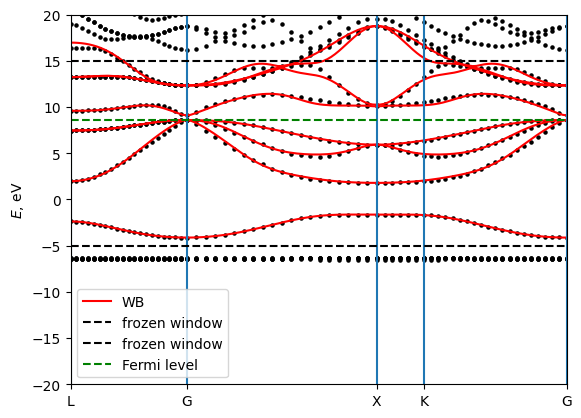

In [9]:
# plot the bands and compare with pw
# EF = 12
import numpy as np
import scipy
import matplotlib.pyplot as plt

A = np.loadtxt("./QEfiles/GaAs.bands_pw.dat.gnu")
bohr_ang = scipy.constants.physical_constants['Bohr radius'][0] / 1e-10
alatt = 10.684511508634104 * bohr_ang  # lattice constant in Angstrom
A[:,0]*= 2*np.pi/alatt
A[:,1] = A[:,1]
plt.scatter(A[:,0], A[:,1], c="black", s=5)



bands_path.plot_path_fat(path,
                quantity=None,
                # save_file="Fe_bands.pdf",
                Eshift=0,
                Emin=-100, Emax=50,
                iband=None,
                mode="fatband",
                fatfactor=20,
                cut_k=False,
                linecolor="red",
                close_fig=False,
                show_fig=False,
                label=f"WB"
                )

plt.ylim(-20,20)

plt.hlines(froz_max, 0, A[-1,0], linestyles="dashed", label="frozen window", color="black")
plt.hlines(froz_min, 0, A[-1,0], linestyles="dashed", label="frozen window", color="black")
plt.hlines(8.597, 0, A[-1,0], linestyles="dashed", label="Fermi level", color="green")
plt.legend()
plt.savefig("Fe_bands.pdf")

## 10. (Optional) Plot the Wannier functions in real space

those xsf files can be visualized with VESTA or XCrysDen

In [10]:
w90data.plotWF(sc_min=-2, sc_max=2)

self.unk.grid_size=(np.int32(12), np.int32(12), np.int32(12))
reduc_r_points = [1 1 1]
wannier function 0 : Im/Re ratio 0.07134826156024297 ((0.0768364941992204-2.213624602672755e-18j))
wannier function 1 : Im/Re ratio 0.07415794011334842 ((0.07491273072130417-1.4505082855040389e-18j))
wannier function 2 : Im/Re ratio 0.07415613055668525 ((0.07491239921597345-6.089174104185538e-18j))
wannier function 3 : Im/Re ratio 0.07415493606453324 ((0.07491284233039075+4.855436493242694e-18j))
wannier function 4 : Im/Re ratio 0.07348259128375702 ((0.10271192769595482-1.9507044637875482e-18j))
wannier function 5 : Im/Re ratio 0.07514513043806312 ((0.1037738669900964-3.517052993782125e-18j))
wannier function 6 : Im/Re ratio 0.07514262013127478 ((0.10377376968312335+7.549360519523342e-18j))
wannier function 7 : Im/Re ratio 0.07514649150501539 ((0.1037742643071256-5.084573298643705e-18j))


(array([ 11.30800051, -11.30800051, -11.30800051]),
 array([[-11.30800051,   0.        ,  11.30800051],
        [  0.        ,  11.30800051,  11.30800051],
        [-11.30800051,  11.30800051,   0.        ]]),
 array([[[[ 3.19246817e-05-1.18952473e-04j,
            4.76799346e-05-1.94572995e-04j,
           -5.42847314e-06-2.49550213e-04j, ...,
           -1.67684864e-04+2.71034247e-05j,
           -4.87604452e-05+5.97164786e-06j,
            2.32535806e-05-4.50114064e-05j],
          [ 4.72951601e-05-1.93763878e-04j,
           -5.62452329e-06-2.63449162e-04j,
           -1.67098928e-04-3.00852036e-04j, ...,
           -6.48277816e-06+1.55493049e-06j,
            2.86517979e-05-5.28328658e-05j,
            2.60286031e-05-1.23402292e-04j],
          [-6.11669316e-06-2.48280811e-04j,
           -1.67571721e-04-3.00483196e-04j,
           -3.23307188e-04-3.03957579e-04j, ...,
            9.95552064e-05-3.99360614e-05j,
            7.32994818e-05-1.09843520e-04j,
            4.81315468e-0

In [11]:
%ls QEfiles

As.upf                 GaAs.WF0006.xsf  UNK00009.1  UNK00028.1  UNK00047.1
bands.in               GaAs.WF0007.xsf  UNK00010.1  UNK00029.1  UNK00048.1
bands.out              GaAs.win         UNK00011.1  UNK00030.1  UNK00049.1
bandsx.in              GaAs.wout        UNK00012.1  UNK00031.1  UNK00050.1
GaAs.bands_pw.dat      GaAs.xml         UNK00013.1  UNK00032.1  UNK00051.1
GaAs.bands_pw.dat.gnu  Ga.upf           UNK00014.1  UNK00033.1  UNK00052.1
GaAs.eig               nscf.in          UNK00015.1  UNK00034.1  UNK00053.1
GaAs.eig.npz           nscf.out         UNK00016.1  UNK00035.1  UNK00054.1
GaAs.mmn               pw2wan.in        UNK00017.1  UNK00036.1  UNK00055.1
GaAs.mmn.npz           scf.in           UNK00018.1  UNK00037.1  UNK00056.1
GaAs.nnkp              scf.out          UNK00019.1  UNK00038.1  UNK00057.1
GaAs..npz              UNK00001.1       UNK00020.1  UNK00039.1  UNK00058.1
GaAs.save/             UNK00002.1       UNK00021.1  UNK00040.1  UNK00059.1
GaAs.WF0000.xsf        UN

In [12]:
calculators = {}

calculators["shift_current"] = wberri.calculators.dynamic.ShiftCurrent(sc_eta=0.1,
        Efermi=np.array([9]),
        omega=np.arange(0, 8, 0.1),
        smr_fixed_width=0.2,
        smr_type='Gaussian',
        kBT=0.01,
    )

grid = wberri.Grid(system, length=100)
result = wberri.run(system, grid, calculators=calculators)


Minimal symmetric FFT grid :  [4 4 4]
Starting run()
Using the follwing calculators : 
############################################################

 'shift_current'  :  <wannierberri.calculators.dynamic.ShiftCurrent object at 0x70a98f3af440>  : calculator not described
############################################################
Calculation on  grid - checking calculators for compatibility
shift_current <wannierberri.calculators.dynamic.ShiftCurrent object at 0x70a98f3af440>
All calculators are compatible
Grid is regular
The set of k points is a Grid() with NKdiv=[8 8 8], NKFFT=[4 4 4], NKtot=[32 32 32]
generating K_list
Done in 0.0011539459228515625 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.031977176666259766 s 
K_list contains 43 Irreducible points(8.4%) out of initial 8x8x8=512 grid
Done, sum of weights:1.0
processing 43 K points : in serial.
# K-points calculated  Wall time (sec)  Est. remaining (sec)


/home/stepan/anaconda3/envs/wbvenv/lib/python3.12/site-packages/wannierberri/grid/grid.py:223: UserWarning:  the requested k-grid [31 31 31] was adjusted to [32 32 32]. 
  warnings.warn(f" the requested k-grid {NK} was adjusted to {NKFFT * NKdiv}. ")


time for processing     43 K-points in serial:     3.4975 ; per K-point          0.0813 ; proc-sec per K-point          0.0813
time1 =  0.001062631607055664
Totally processed 43 K-points 
run() finished


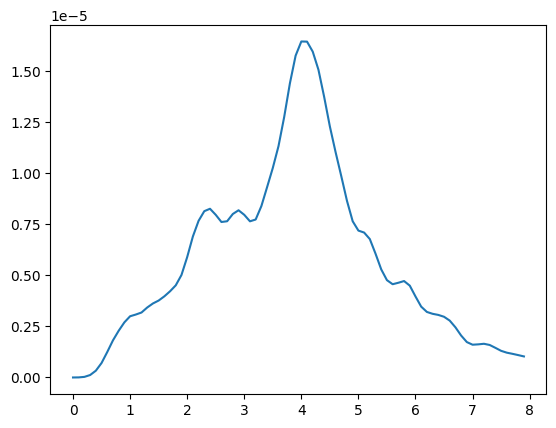

In [13]:
x = result.results['shift_current'].Energies[1]
y = result.results['shift_current'].data[0, :, 0, 1, 2,].real
plt.plot(x, y, label='shift current')

Compare to the figure in paper by Julen https://journals.aps.org/prb/abstract/10.1103/PhysRevB.97.245143#f3


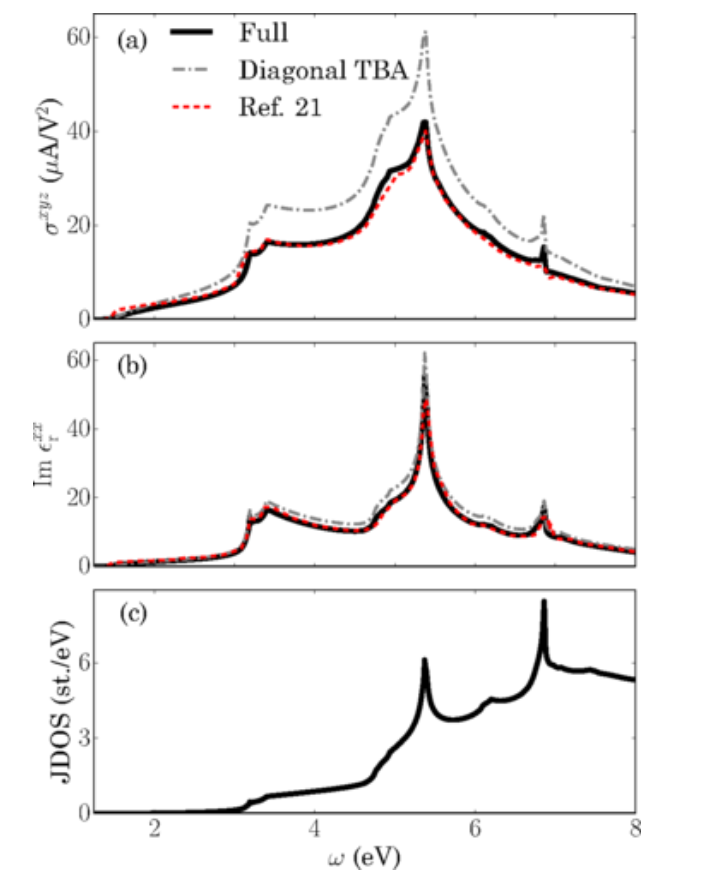